# Vaccination Tweets: EDA, Sentiment Analyis

Agenda:
+ Frequency
    + most frequent words in tweets
    + look at most popular hashtags (in 'text' and in 'hashtags')
    + what is the most tweeted-about vaccine?
+ Time
    + Which vaccine "trends" in tweets? (time series)
    + Do different vaccines trend at different times as tweet subjects?

+ Sentiment
    + vaccine most closely connected to negative/positive sentiment
    + most influential sources who tweet positive/negative/neutral about vaccines in general
    + locations (uncleared) with the most positive, negative, neutral tweets
    + Positive, negative, neutral: which gets more retweets / are liked more?

(Measuring general attitude via tweets: how many people tweet by population, how many by population tweet about vaccines, how well are vaccinations monitored)

+ id:
+ user_name:
+ user_location: entered by user
+ user_description: entered by user
+ user_created: date of when the account was opened
+ user_followers: number of users which follow a specified user
+ user_friends: number of users which a specified user follows
+ user_favourites: 
+ user_verified: accounts of officially recognized organizations, users with many followers
+ date: date of tweet
+ text: text of the tweet
+ hashtags: hashtags user in the tweet
+ source: 
+ retweets: number of retweets
+ favorites:
+ is_retweet: whether the tweets is a retweet or not

Added:
+ day: 

In [1]:
# Main data packages. 
import numpy as np
import pandas as pd
from datetime import datetime

import pickle

#text processing, NLP modules
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
#plotting
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#nltk.download('punkt')
#nltk.download('wordnet')

In [3]:
df = pd.read_csv("Data/vaccination_tweets.csv")

In [4]:
df_tweety = df.copy()

In [5]:
shape = df_tweety.shape
print('The unmodified vaccination tweets dataset contains {} columns and {} rows.'.format(shape[1], shape[0]))

The unmodified vaccination tweets dataset contains 16 columns and 38547 rows.


In [6]:
#Insert column 'day' to map the vaccination progress data set
df_tweety['day'] = pd.to_datetime(df_tweety.date).dt.date

## Dropping stuff(?)

'user_location' is filled by users in an unsystematic way

In [7]:
df_tweety.user_location.nunique()

8098

In [8]:
#The below mentioned columns should be dropped
df_tweety = df_tweety.drop(['id', 'user_description', 'is_retweet', 'source'], axis=1)

## Reshape the data set

Tweets in 'text' are typically cut off (max 140 characters). The cut-off-pattern is '...', followed by an empty space and a link to the tweet. Using this pattern to reduce the dataset we receive a considerably shorter set of certainly complete tweets to analyze.

In [9]:
df_tweety = df_tweety[~(df_tweety['text'].str.contains('... http'))].reset_index()

In [10]:
df_tweety.shape

(5621, 14)

In [11]:
df_tweety.to_csv('fulltweets.csv')

While few tweet the same text more often, more than a fifth of users in the dataset tweet more than once. Assuming that repetitiveness is not linked towards particular sentiments, we leave all tweets in the dataset.

In [12]:
(len(df_tweety) - df_tweety.user_name.nunique())/len(df_tweety)

0.2284291051414339

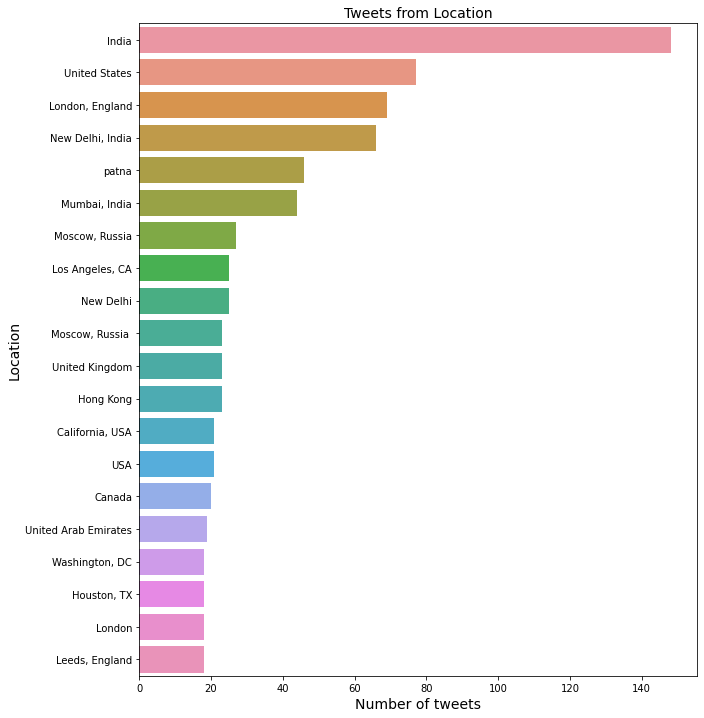

In [13]:
#user_location columns is very diverse
plt.figure(figsize=(10,12))
sns.barplot(df_tweety["user_location"].value_counts().values[0:20],
            df_tweety["user_location"].value_counts().index[0:20]);
plt.title("Tweets from Location",fontsize=14)
plt.xlabel("Number of tweets",fontsize=14)
plt.ylabel("Location",fontsize=14)
plt.show()

### Most frequent hashtags in 'hashtags'

Lists in 'hashtags' are stored as strings

In [14]:
#for i, l in enumerate(df_tweety['hashtags']):
    #print("list",i,"is",type(l))

lst_ = "['erst', 'zweit', 'dritt']"

def clean_hashtag(name):
    name = name.replace("[", "")
    name = name.replace("]", "")
    name = name.replace("'", "")
    name_lst = name.split(",")
    hash_lst = list()
    for item in name_lst:
        item = item.strip()
        hash_lst.append(item)
    return hash_lst

In [15]:
df_tweety['hashtags'] = df_tweety['hashtags'].apply(eval)

TypeError: eval() arg 1 must be a string, bytes or code object

In [16]:
df_tweety['hashtags'] = df_tweety['hashtags'].fillna('[]')

def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

hasht_freq = to_1D(df_tweety['hashtags']).value_counts()[:30].rename_axis('hasht_freq').reset_index(name='count')
hasht_freq

,hasht_freq,count
0,',24590
1,a,11429
2,i,10827
3,n,10434
4,c,10055
5,o,9690
6,e,9303
7,,6707
8,",",6707
9,r,6538


In [17]:
df_tweety['hashtags'] = df_tweety['hashtags'].apply(eval)

In [18]:
df_tweety['hashtags'] = df_tweety['hashtags'].fillna('[]')

def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

hasht_freq = to_1D(df_tweety['hashtags']).value_counts()[:30].rename_axis('hasht_freq').reset_index(name='count')
hasht_freq

,hasht_freq,count
0,moderna,1935
1,covaxin,1356
2,pfizerbiontech,709
3,sputnikv,694
4,vaccine,543
5,covid19,525
6,oxfordastrazeneca,491
7,covidvaccine,354
8,pfizer,299
9,sinovac,252


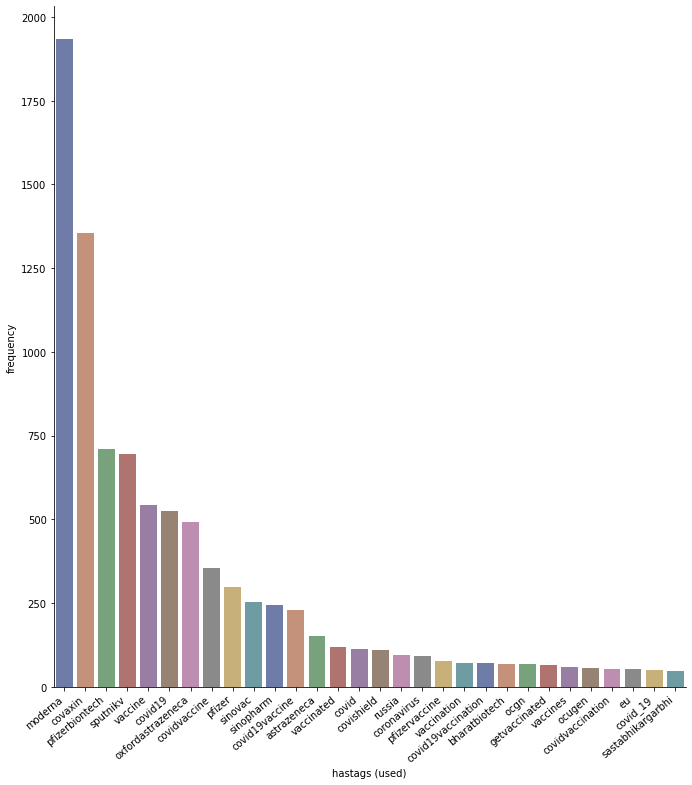

In [19]:
#f, ax = plt.subplots(figsize=(7, 5))

g = sns.catplot(
    data=hasht_freq, kind="bar",
    x="hasht_freq", y="count",# hue="sex",
    ci="sd", palette="dark", height=10, alpha=.6
)
#g.despine(left=True)
g.set_axis_labels("hastags (used)", "frequency")
g.set_xticklabels(rotation=40, ha="right")
#g.legend.set_title("")

In contrast, particular vaccines or the vaccination topic play the dominant role in the category of used hashtags. Politicians or institutions do not figure prominently in this category.

## Rank #s, append hashtag columns to dataframe

Idea: create df with vaccines in hashtags as columns and append it to df_tweety

In [20]:
def to_1D(Series):
    return pd.Series([x.lower() for lst in Series for x in lst])

unique_hasht = to_1D(df_tweety['hashtags']).value_counts()[:30]

In [21]:
def boolean_df(item_lists, unique_items):

    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask that returns a True-False list of whether a tag is in a taglist
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [22]:
hasht_bool = boolean_df(df_tweety['hashtags'], unique_hasht.keys())
#Drop non-vaccine related columns
#hasht_bool.drop(['covid19', 'covid', 'china', 'russia', 'bharatbiotech', 'eu', 'india', 'covid_19', 'coronavirus'], axis=1)

In [23]:
df_tweety_vaccs = pd.concat([df_tweety, hasht_bool], axis=1)
df_tweety_vaccs = df_tweety_vaccs.drop(['user_followers', 'user_friends', 'user_favourites', 'hashtags', 'user_verified',
       'date'], axis=1)

# Cleaning 'text' (round 1)

In [24]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stopwords = nltk.corpus.stopwords.words('english')
#newStopWords = ['moderna', 'covaxin', 'covid19', 'pfizerbiontech', 'vaccine', 'sputnikv', 'oxfordastrazeneca', 'covidvaccine', 'pfizer', 'sinovac', 'sinopharm', 'covid19vaccine', 'astrazeneca', 'covid', 'coronavirus', 'vaccines', 'china', 'russia', 'covishield', 'vaccination', 'vaccinated', 'pfizervaccine', 'eu', 'india', 'covid_19', 'bharatbiotech', 'covidvaccination', 'covid19vaccination', 'coronavaccine', 'mrna', 'johnsonandjohnson', 'getvaccinated', 'biontech', 'narendramodi', 'hongkong', 'pakistan', 'covidvacccine', 'pmmodi', 'modernavaccine', 'ocgn', 'iran', 'nhs', 'coronavirusvaccine', 'ocugen', 'breaking', 'covidvaccines', 'aiims', 'russian', 'pfizercovidvaccine', 'vaccineswork', 'news', 'putin', 'uk', 'who', 'us', 'canada', 'italy', 'covidー19', 'covid19vaccines', 'israel', 'corona', 'hungary', 'zimbabwe', 'pandemic', 'covax', 'oxfordvaccine', 'usa', 'health', 'modi', 'vaccine', 'first', 'covid', 'dose', 'today', '19', 'vaccines', 'amp', 'shot', 'doses']
#stopwords.extend(newStopWords)

In [25]:
def clean_tweet_vader(x):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    x = str(x)
    x = x.lower()

    #remove twitter handlers
    x = re.sub('@[^\s]+','',x)
    #remove hashtags
    x = re.sub('#[^\s]+','',x)
    #remove URLs
    x = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', x)
    #remove punctuation
    #x = x.replace('[^\w\s]','')
    #remove single characters
    x = re.sub(r'\s+[a-zA-Z0-9]\s+', '', x)
    #substitute multiple spaces with single space
    x = re.sub(r'\s+', ' ', x, flags=re.I)
    #remove linebreaks
    x = re.sub('\n', '', x)
    #remove special characters
    x = ' '.join(re.findall(r'\w+', x))
    #stemming
    #x = ' '.join([stemmer.stem(word) for word in x.split() ])
    #lemmatizing
    #x = ' '.join([lemmatizer.lemmatize(word) for word in x.split() ])
    #removing stop words
    x = ' '.join([word for word in x.split() if word not in stopwords])
    #removing numbers
    #x = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", x)
    #x = x.split()

    return x

In [26]:
df_tweety.text = df_tweety.text.apply(lambda x: clean_tweet_vader(x))

# First sentiment analysis (VADER)

In [27]:
#!pip install vaderSentiment

In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [29]:
analyser = SentimentIntensityAnalyzer()
scores=[]

for i in range(len(df_tweety['text'])):
    
    score = analyser.polarity_scores(df_tweety['text'][i])
    score=score['compound']
    scores.append(score)
    
sentiment=[]
for i in scores:
    if i>=0.06:
        sentiment.append('positive')
    elif i<=(-0.06):
        sentiment.append('negative')
    else:
        sentiment.append('neutral')

df_tweety['sentiment']=pd.Series(np.array(sentiment))
df_tweety_vaccs['sentiment']=pd.Series(np.array(sentiment))

In [30]:
scores = pd.Series(np.array(scores))

In [31]:
df_scores = pd.DataFrame(scores).reset_index()
df_scores2 = df_scores.rename(columns={0: 'sentiment'})
df_scores2.columns

Index(['index', 'sentiment'], dtype='object')

<AxesSubplot:xlabel='index', ylabel='sentiment'>

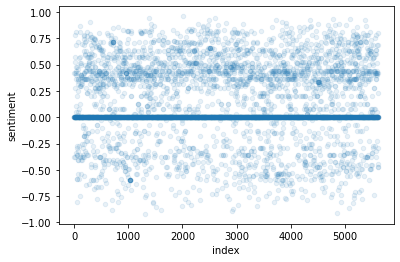

In [32]:
df_scores2.plot.scatter(x='index', y='sentiment', alpha=0.1)

In [45]:
df_tweety['scores'] = scores
#df_twee.sentiment.value_counts()/len(df_tweety)

import statsmodels.formula.api as smf

# mpg explained by horsepower and weight
smf.ols(formula='scores ~ user_followers + retweets + user_favourites + user_friends + favorites', data=df_tweety).fit().summary()

In [34]:
df_tweety.columns

Index(['index', 'user_name', 'user_location', 'user_created', 'user_followers',
       'user_friends', 'user_favourites', 'user_verified', 'date', 'text',
       'hashtags', 'retweets', 'favorites', 'day', 'sentiment'],
      dtype='object')

## Sentiment Plotting

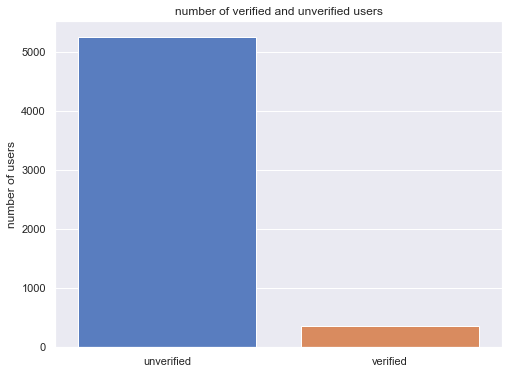

From 5621 accounts, 6.46% have the status 'verified'


In [194]:
sns.set_theme()
sns.set_palette('muted')
plt.figure(figsize = (8,6))
#Print users (verified/unverified), "verified" meaning that they are recognized to have some sort of official character
ax = sns.countplot(x='user_verified', data=df_tweety)
ax.set(xlabel='', ylabel='number of users', title='number of verified and unverified users')
plt.xticks(ticks=[False,True], labels=['unverified','verified'])
plt.show()
print(f'From {df_tweety.shape[0]} accounts, {round(df_tweety.user_verified.mean()*100, 2)}% have the status \'verified\'')

### General

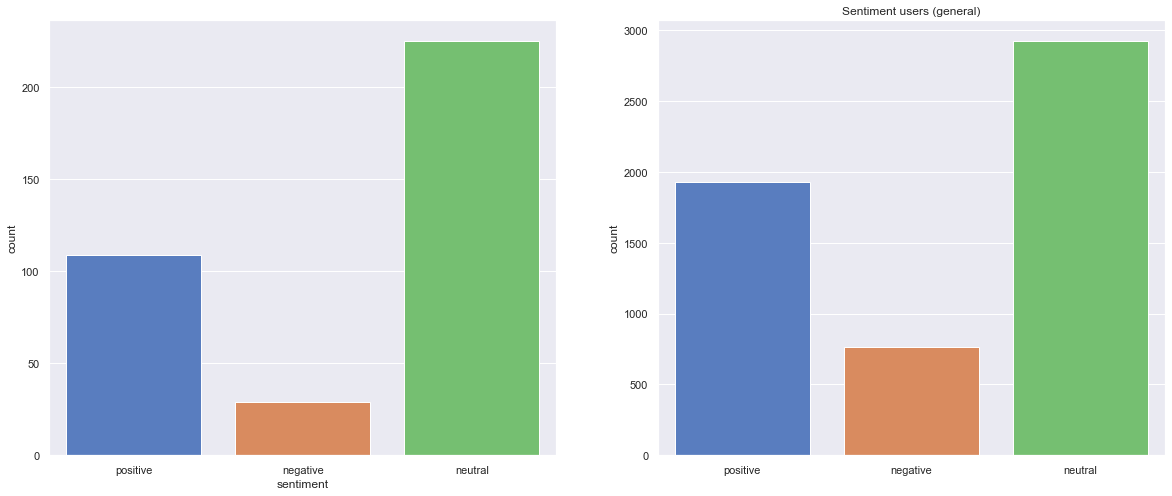

In [195]:
order_list = ['positive', 'negative', 'neutral']
plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)
sns.countplot(x='sentiment',data=df_tweety[df_tweety['user_verified']==True], order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (verified)')
plt.subplot(1, 2, 2)
ax = sns.countplot(x='sentiment',data=df_tweety, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sentiment users (general)')
plt.show()

### Vaccines

In [196]:
#Create subframes for plotting the sentiments relative to specific vaccines
df_moderna = df_tweety_vaccs[(df_tweety_vaccs['moderna']==True)]
df_moderna1 = df_moderna[['moderna', 'sentiment']]

df_covaxin = df_tweety_vaccs[(df_tweety_vaccs['covaxin']==True)]
df_covaxin1 = df_covaxin[['covaxin', 'sentiment']]

df_vacc = df_tweety_vaccs[(df_tweety_vaccs['vaccine']==True) | 
                          (df_tweety_vaccs['vaccinated']==True) |
                          (df_tweety_vaccs['vaccines']==True) |
                          (df_tweety_vaccs['covidvaccination']==True)|
                          (df_tweety_vaccs['covid19vaccination']==True)]
df_vacc1 = df_vacc['sentiment']

df_sinovac = df_tweety_vaccs[(df_tweety_vaccs['sinovac']==True)]
df_sinovac1 = df_sinovac[['sinovac', 'sentiment']]

df_sinopharm = df_tweety_vaccs[(df_tweety_vaccs['sinopharm']==True)]
df_sinopharm1 = df_sinopharm[['sinopharm', 'sentiment']]

df_biontech = df_tweety_vaccs[(df_tweety_vaccs['pfizerbiontech']==True)|
                              (df_tweety_vaccs['pfizer']==True)|
                              (df_tweety_vaccs['pfizervaccine']==True)]
df_biontech1 = df_biontech[['sentiment']]

df_astrazeneca = df_tweety_vaccs[(df_tweety_vaccs['astrazeneca']==True)|
                                (df_tweety_vaccs['oxfordastrazeneca']==True)]
df_astrazeneca1 = df_astrazeneca[['sentiment']]

df_sputnik = df_tweety_vaccs[(df_tweety_vaccs['sputnikv']==True)]
df_sputnik1 = df_sputnik[['sputnikv', 'sentiment']]

[Text(0.5, 0, ''), Text(0, 0.5, 'count'), Text(0.5, 1.0, 'covaxin')]

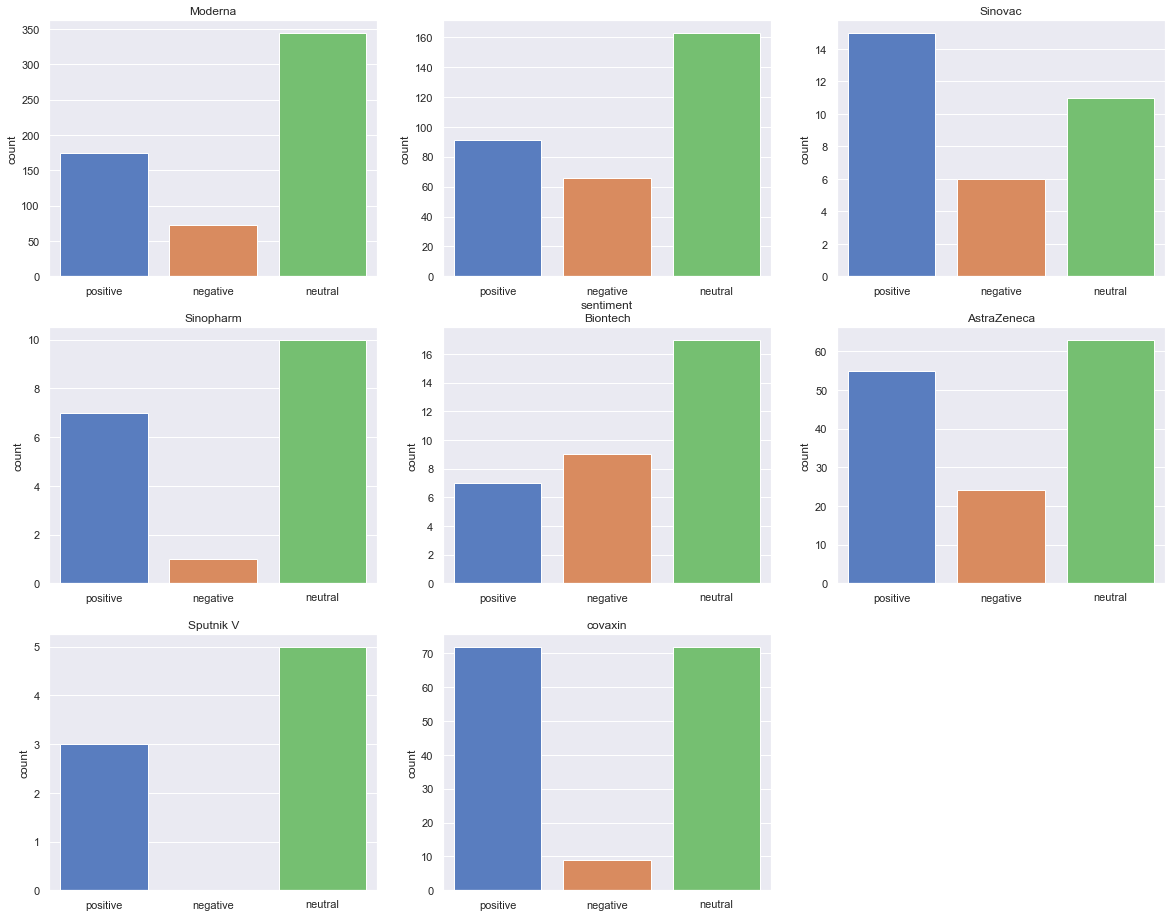

In [197]:
order_list = ['positive', 'negative', 'neutral']

plt.figure(figsize = (20, 16))

plt.subplot(3, 3, 1)
ax = sns.countplot(x='sentiment',data=df_vacc, order = order_list)
ax.set(xlabel='', ylabel='count', title='Vaccine')
plt.subplot(3, 3, 2)
sns.countplot(x='sentiment',data=df_moderna, order = order_list)
ax.set(xlabel='', ylabel='count', title='Moderna')
plt.subplot(3, 3, 3)
ax = sns.countplot(x='sentiment',data=df_sinovac, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sinovac')

plt.subplot(3, 3, 4)
ax = sns.countplot(x='sentiment',data=df_sinopharm, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sinopharm')
plt.subplot(3, 3, 5)
ax = sns.countplot(x='sentiment',data=df_biontech, order = order_list)
ax.set(xlabel='', ylabel='count', title='Biontech')
plt.subplot(3, 3, 6)
ax = sns.countplot(x='sentiment',data=df_astrazeneca, order = order_list)
ax.set(xlabel='', ylabel='count', title='AstraZeneca')

plt.subplot(3, 3, 7)
ax = sns.countplot(x='sentiment',data=df_sputnik, order = order_list)
ax.set(xlabel='', ylabel='count', title='Sputnik V')
plt.subplot(3, 3, 8)
ax = sns.countplot(x='sentiment',data=df_covaxin, order = order_list)
ax.set(xlabel='', ylabel='count', title='covaxin')


## Influential

Identify whether the most popular users tweet predominantly positively, negatively or neutrally. Is it possible to see, how their followers tweet? Is there a mutual influence?

Create a measure of influence

In [104]:
twinfluence1 = df_tweety.sort_values("user_followers", ascending=False)

### by 'user_follower'

<AxesSubplot:xlabel='user_followers', ylabel='user_name'>

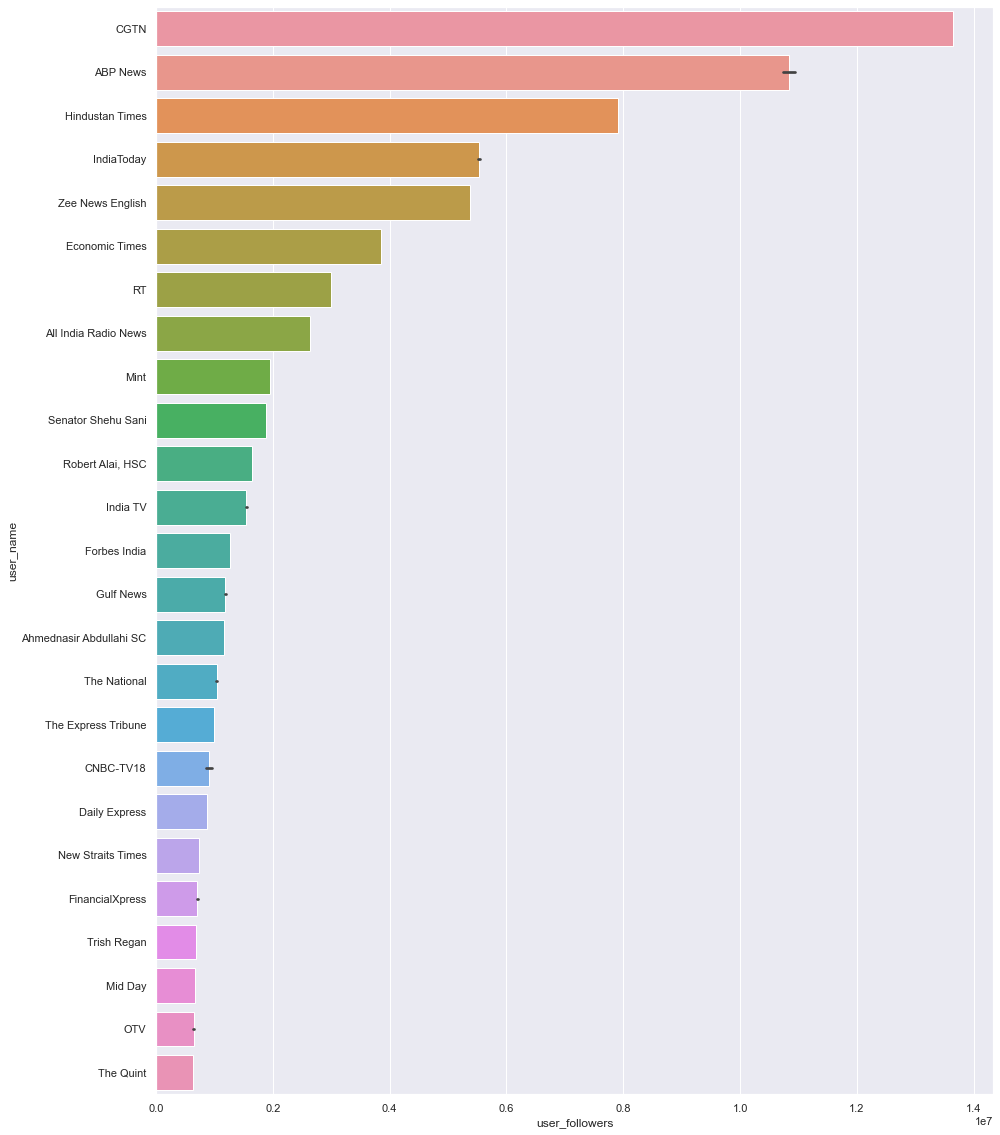

In [105]:
f, ax = plt.subplots(figsize=(15, 20))
sns.barplot(x='user_followers', y='user_name', orient='h', data=twinfluence1[['user_name', 'user_followers']][:100])

<AxesSubplot:xlabel='user_followers', ylabel='user_name'>

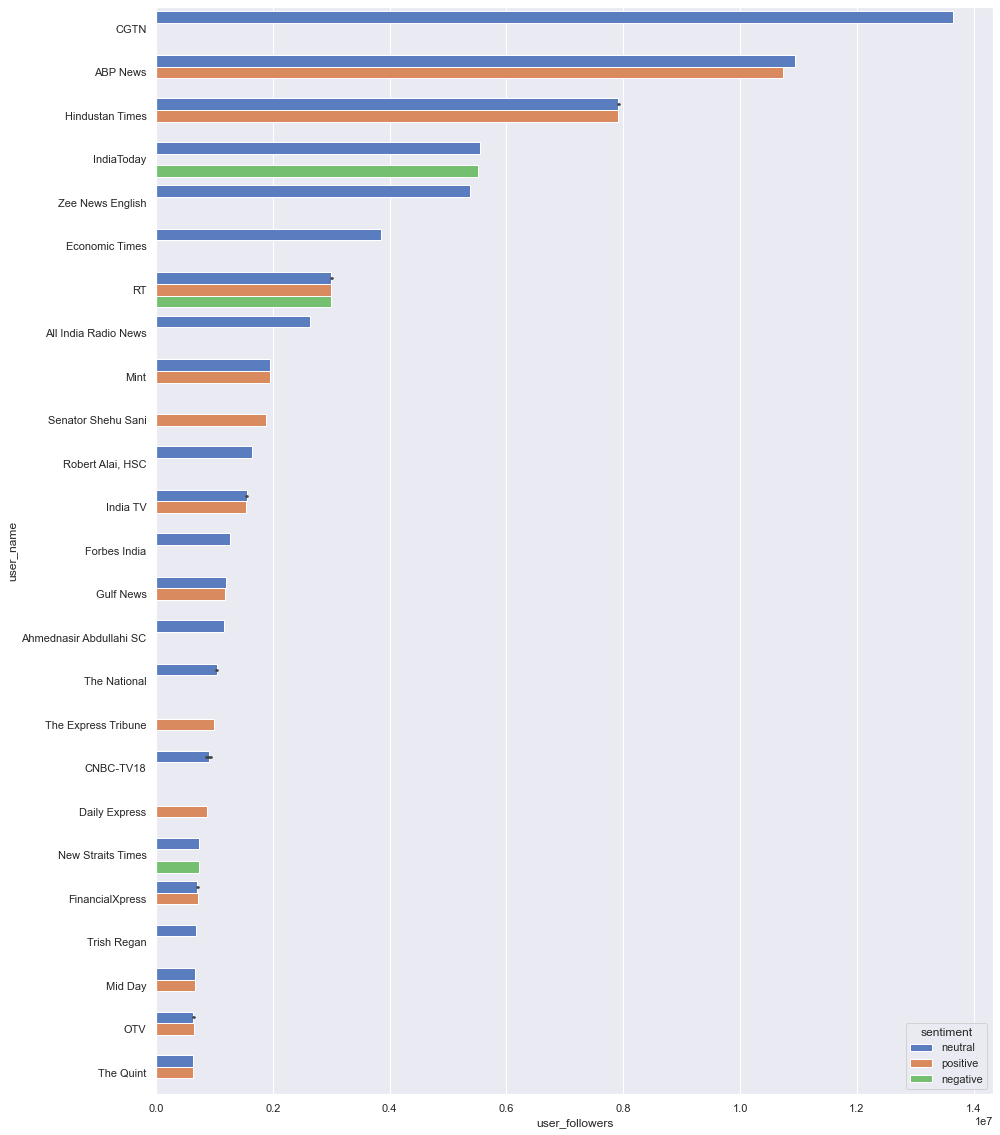

In [106]:
order_list = ['positive', 'negative', 'neutral']
f, ax = plt.subplots(figsize=(15, 20))
sns.barplot(x='user_followers', y='user_name', hue='sentiment', orient='h', data=twinfluence1[['user_name', 'user_followers', 'sentiment']][:100])

In [107]:
# delete multiples for certain purposes! Written

### retweeted

<AxesSubplot:xlabel='retweets', ylabel='user_name'>

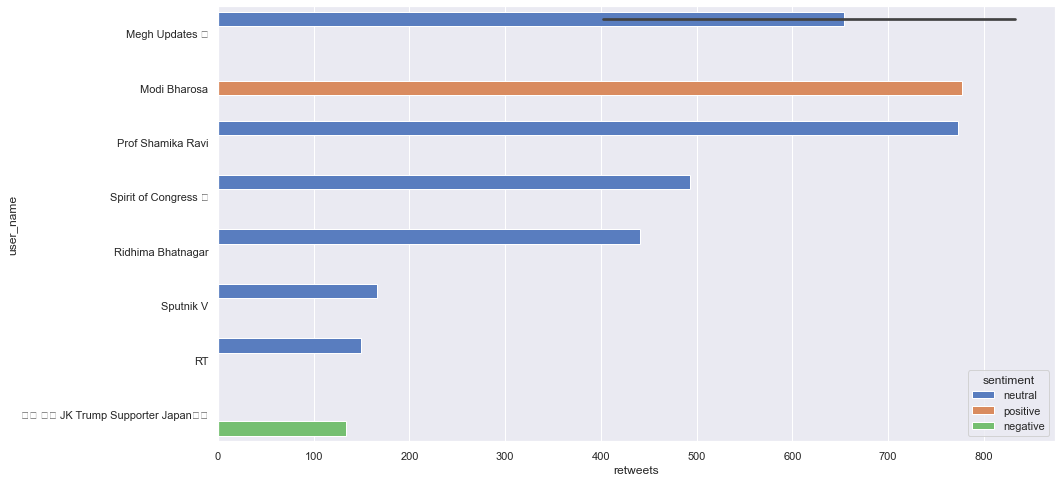

In [108]:
twinfluence2 = df_tweety.sort_values("retweets", ascending=False)

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='retweets', y='user_name', orient='h', hue='sentiment', data=twinfluence2[['retweets', 'user_name', 'sentiment']][:10])

### 'user_favourites'

<AxesSubplot:xlabel='favorites', ylabel='user_name'>

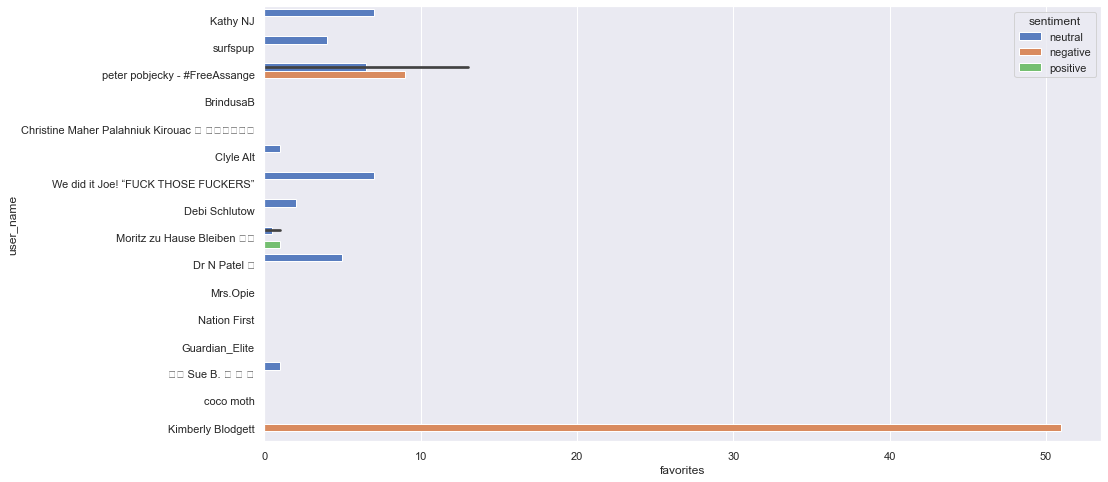

In [109]:
twinfluence3 = df_tweety.sort_values("user_favourites", ascending=False)

f, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x='favorites', y='user_name',  hue='sentiment', orient='h', data=twinfluence3[['user_name', 'favorites', 'sentiment']][:20])

### Create dataframe for vaccination progress and sentiments over time

In [110]:
#df_tweety = pd.concat([df_tweety, pd.get_dummies(df_tweety['sentiment'], drop_first=False, prefix='v')], axis=1)

In [58]:
tweety_wide = pd.pivot_table(df_tweety, index='day', columns='sentiment', values='user_created', aggfunc=pd.Series.nunique)

In [59]:
tweety_flat = pd.DataFrame(tweety_wide.to_records()).drop([0, 102, 103]).reset_index()

In [60]:
global_vacc = pd.read_csv('Data/df_global.csv')

In [61]:
global_vacc_senti = global_vacc.drop([12]).reset_index(drop=True)

In [62]:
global_vacc_senti[['negative', 'neutral', 'positive']] = tweety_flat[['negative', 'neutral', 'positive']]

In [63]:
global_vacc_senti.to_csv('Data/global_vacc_senti2.csv')

# Tweet over time, sentiment conponents

<AxesSubplot:xlabel='day'>

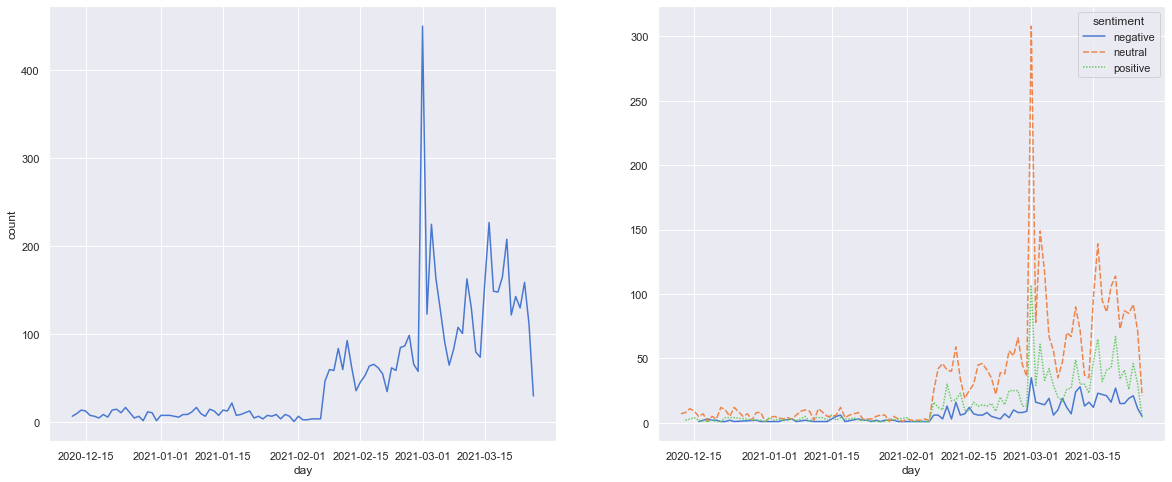

In [111]:
over_days = df_tweety.groupby(['day'])['index'].count().reset_index()
over_days.columns = ['day', 'count']

tweety_wide = pd.pivot_table(df_tweety, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="count",
             data=over_days)

plt.subplot(1, 2, 2)
sns.lineplot(data=tweety_wide)

What happened on the first of march, in mid-february and in mid-march?

## Vaccines

### Moderna

<AxesSubplot:xlabel='day'>

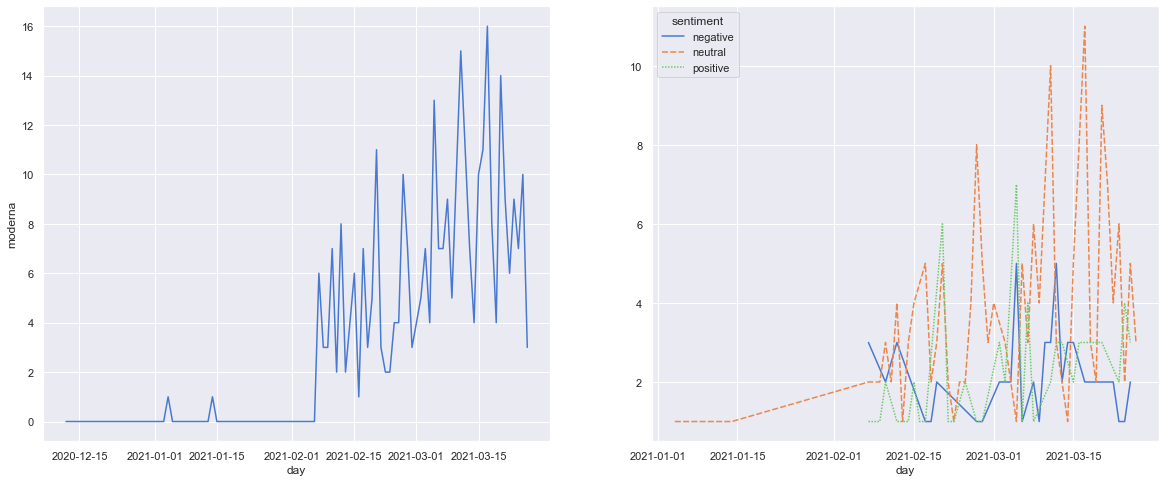

In [112]:
moderna1 = df_tweety_vaccs.groupby(['day'])['moderna'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
moderna1 = pd.DataFrame(moderna1).reset_index()

moderna2 = pd.pivot_table(df_moderna, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="moderna", data=moderna1)

plt.subplot(1, 2, 2)
sns.lineplot(data=moderna2)

### Covaxin

<AxesSubplot:xlabel='day'>

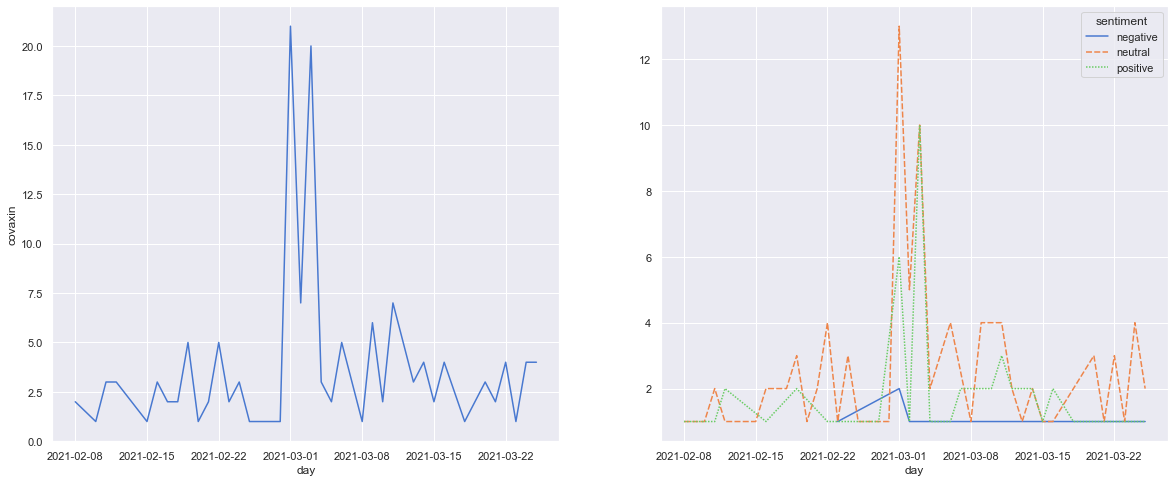

In [113]:
covaxin1 = df_covaxin.groupby(['day'])['covaxin'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
covaxin1 = pd.DataFrame(covaxin1).reset_index()

covaxin2 = pd.pivot_table(df_covaxin, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="covaxin", data=covaxin1)

plt.subplot(1, 2, 2)
sns.lineplot(data=covaxin2)

### AstraZeneca

<AxesSubplot:xlabel='day'>

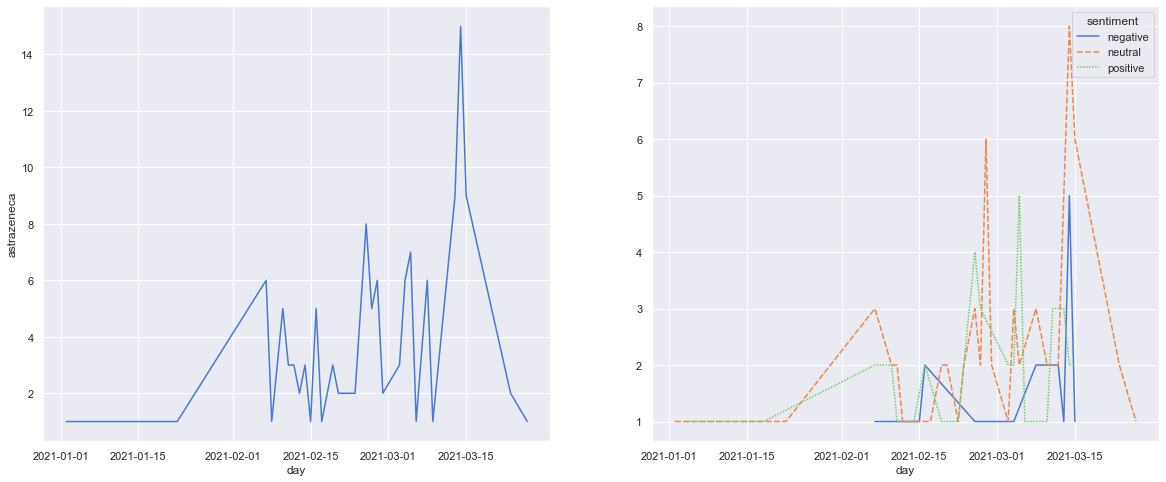

In [114]:
astrazeneca1 = df_astrazeneca.groupby(['day'])['astrazeneca'].count()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
astrazeneca1 = pd.DataFrame(astrazeneca1).reset_index()

astrazeneca = pd.pivot_table(df_astrazeneca, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="astrazeneca", data=astrazeneca1)

plt.subplot(1, 2, 2)
sns.lineplot(data=astrazeneca)

<AxesSubplot:xlabel='day'>

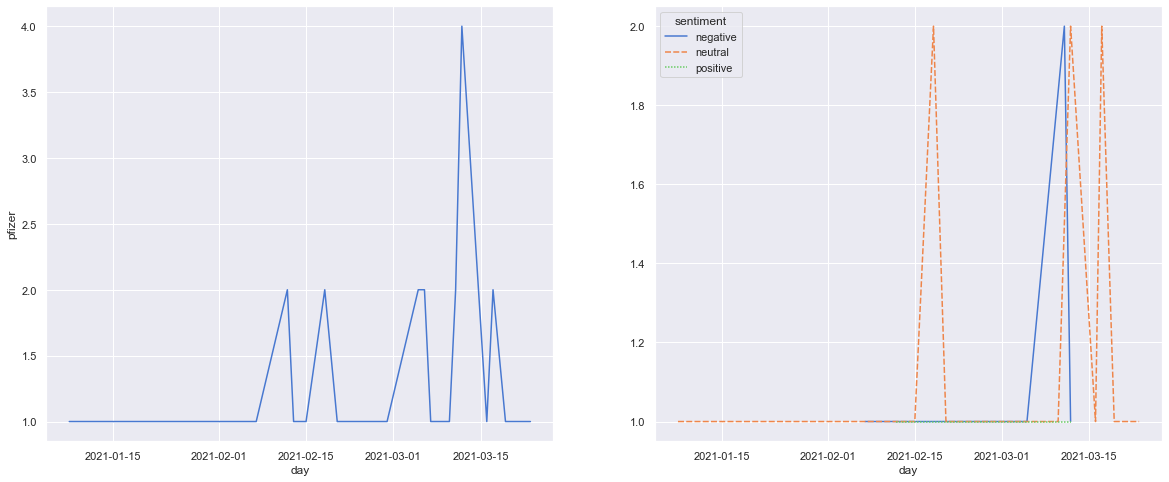

In [115]:
pfizer1 = df_biontech.groupby(['day'])['pfizer'].count()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
pfizer1 = pd.DataFrame(pfizer1).reset_index()

pfizer = pd.pivot_table(df_biontech, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="pfizer", data=pfizer1)

plt.subplot(1, 2, 2)
sns.lineplot(data=pfizer)

<AxesSubplot:xlabel='day'>

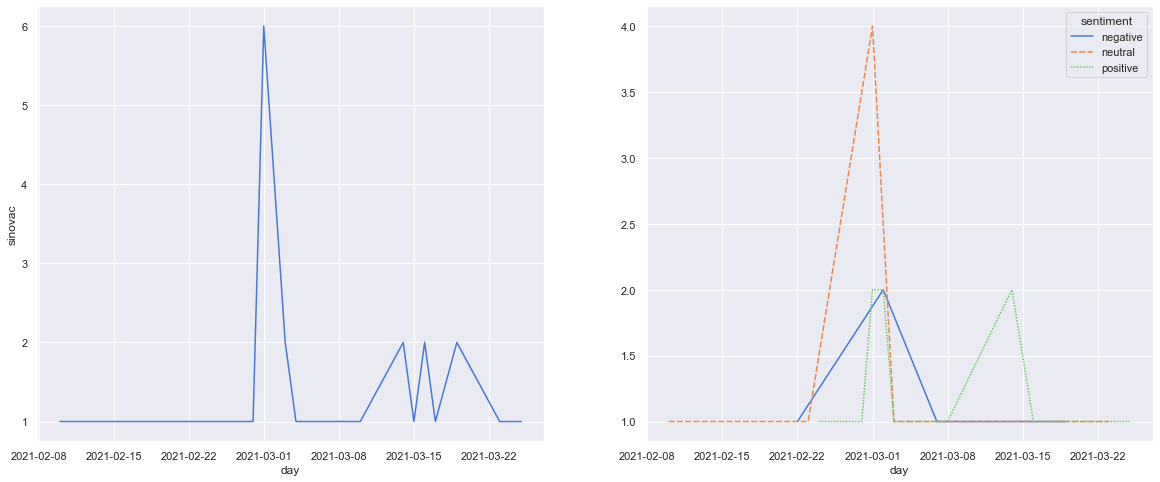

In [116]:
sinovac1 = df_sinovac.groupby(['day'])['sinovac'].sum()#, index='day', columns=['sentiment'], values='index', aggfunc=pd.Series.nunique)
sinovac1 = pd.DataFrame(sinovac1).reset_index()

sinovac = pd.pivot_table(df_sinovac, index='day', columns='sentiment', values='index', aggfunc=pd.Series.nunique)

plt.figure(figsize = (20, 8))

plt.subplot(1, 2, 1)
sns.lineplot(x="day", y="sinovac", data=sinovac1)

plt.subplot(1, 2, 2)
sns.lineplot(data=sinovac)

What happened on the first of march, in mid-february and in mid-march?

# Import labelled tweets and evaluate VADER

In [117]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score

In [118]:
#!pip install pandas_ml

In [198]:
df_full_label = pd.read_csv('Data/fulltweets_labels2.csv', sep=';')
df_labels = df_full_label.copy()

In [199]:
df_tweety['label'] = df_labels['sentiment']

In [200]:
df_tweety.tail()

,index,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,day,sentiment,label
5616,38465,Superhik,Mars,2021-03-10 18:18:46,3,67,124,False,2021-03-18 15:35:11,crosswords,"[eu, astrazenec, sputnikv, sinofarm]",0,0,2021-03-18,neutral,neutral
5617,38466,The Peninsula Qatar,Qatar,2009-07-25 08:41:05,53064,223,775,True,2021-03-18 15:30:00,authorities seize fake batch russian vaccine,"[Mexico, SputnikV]",0,1,2021-03-18,negative,neutral
5618,38469,ShahPilesClinic,"Queens, NY",2016-10-20 08:50:52,2,15,428,False,2021-03-18 15:12:21,expect indian government allow access vaccine,[SputnikV],0,0,2021-03-18,positive,neutral
5619,38496,Lukyluke31,Italia,2019-12-09 04:02:18,898,1869,144009,False,2021-03-18 13:51:02,go go,[SputnikV],0,1,2021-03-18,neutral,positive
5620,38524,Barkow Consulting,"Düsseldorf, Deutschland",2010-09-09 16:32:36,10690,7598,14481,False,2021-03-18 09:33:09,mr putin,[SputnikV],0,0,2021-03-18,neutral,neutral


## Create data frame to validate VADER sentiment analysis against labelled tweets

In [201]:
df_test = df_tweety[0:1000]

In [202]:
df_test

,index,user_name,user_location,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,retweets,favorites,day,sentiment,label
0,8,Erin Despas,NaN,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,covid vaccine getting,"[CovidVaccine, covid19, PfizerBioNTech, Moderna]",2,1,2020-12-12,neutral,neutral
1,32,Contagion,"Cranbury, NJ",2016-01-29 15:54:55,5998,815,5867,False,2020-12-12 13:00:00,authorized united states last night,"[ICYMI, FDA, PfizerBioNTech, COVID19, Vaccine]",0,1,2020-12-12,positive,neutral
2,35,Shahjhan Malik | #WearAMask,"Nottinghamshire, England",2017-06-22 06:22:55,41708,2868,47862,False,2020-12-12 12:42:31,immigrant muslim couple find covid 19 vaccine,"[CovidVaccine, PfizerBioNTech, Pfizervaccine, ...",2,37,2020-12-12,neutral,neutral
3,37,Farooq Anees,"دبي, الامارات العربية المتحدة",2010-12-23 11:51:01,293,319,165,False,2020-12-12 12:20:30,ladies gentlemen experts every household,"[CovidVaccine, Pakistan, PfizerBioNTech, oxfor...",0,0,2020-12-12,neutral,neutral
4,38,KHuntson,USA🇺🇸,2014-01-31 01:25:24,2035,1672,6734,False,2020-12-12 12:19:56,fact sheet healthcare providers administering ...,"[PfizerBioNTech, CovidVaccine]",0,0,2020-12-12,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8796,Neha,India,2018-08-30 13:47:20,6592,45,33950,False,2021-02-15 06:19:44,side effects,[Covaxin],2,6,2021-02-15,neutral,neutral
996,8824,Hrushikesha Mohanty,ରହୁରହୁ ହାଇଦରବାଦିଆ,2011-06-12 19:52:56,1591,77,7400,False,2021-02-14 15:11:49,seen covaxin trending twitter let give scienti...,"[JayVigyan, Covaxin]",0,8,2021-02-14,positive,positive
997,8828,Revati,Kerala,2009-09-23 13:59:24,4200,656,27914,False,2021-02-14 11:57:30,got clarifications,[Covaxin],2,10,2021-02-14,neutral,negative
998,8834,WAM English,UAE,2014-09-04 10:22:21,42764,18,11,True,2021-02-15 09:11:14,approves russia vaccine use,"[Kazakhstan, SputnikV, WamNews]",0,1,2021-02-15,positive,neutral


In [203]:
df_test.label.value_counts()/len(df_test)

neutral    1
positive   0
negative   0
Name: label, dtype: float64

In [204]:
df_test.sentiment.value_counts()/len(df_test)

neutral    0
positive   0
negative   0
Name: sentiment, dtype: float64

Comparing VADER on the full dataset (all tweets) and the subset (full tweets) gives a similar distribution of positive, neutral and negative values.

Comparing VADER predictions and labels on the subset, the labels tend towards neutrality at the expense of negative tweets. More tweets than in VADER's prediction come out as neutral.

In [205]:
#change values from strings to numbers
booleans = {'negative': -1, 'positive': 1, 'neutral': 0}

In [206]:
df_test['label'] = df_test['label'].map(booleans)

In [207]:
df_test['sentiment'] = df_test['sentiment'].map(booleans)

In [85]:
df_test.to_csv('Data/tweety_test.csv', index=False)

In [208]:
#transform series to arrays for evaluation
y_test = np.array(df_test['label'])
y_pred = np.array(df_test['sentiment'])
y_test = y_test.astype(float)
pd.options.display.float_format = '{:,.0f}'.format

In [209]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[ 53  37  23]
 [ 77 300 140]
 [ 25 158 187]]

Accuracy: 0.54

Micro Precision: 0.54
Micro Recall: 0.54
Micro F1-score: 0.54

Macro Precision: 0.49
Macro Recall: 0.52
Macro F1-score: 0.50

Weighted Precision: 0.55
Weighted Recall: 0.54
Weighted F1-score: 0.54

Classification Report

              precision    recall  f1-score   support

     Class 1       0.34      0.47      0.40       113
     Class 2       0.61      0.58      0.59       517
     Class 3       0.53      0.51      0.52       370

    accuracy                           0.54      1000
   macro avg       0.49      0.52      0.50      1000
weighted avg       0.55      0.54      0.54      1000



In [274]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[ 58  22  32]
 [ 27 214 129]
 [ 82 143 292]]

Accuracy: 0.56

Micro Precision: 0.56
Micro Recall: 0.56
Micro F1-score: 0.56

Macro Precision: 0.52
Macro Recall: 0.55
Macro F1-score: 0.53

Weighted Precision: 0.58
Weighted Recall: 0.56
Weighted F1-score: 0.57

Classification Report

              precision    recall  f1-score   support

     Class 1       0.35      0.52      0.42       112
     Class 2       0.56      0.58      0.57       370
     Class 3       0.64      0.56      0.60       517

    accuracy                           0.56       999
   macro avg       0.52      0.55      0.53       999
weighted avg       0.58      0.56      0.57       999



In [743]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[ 56  23  34]
 [ 25 211 134]
 [ 83 136 298]]

Accuracy: 0.56

Micro Precision: 0.56
Micro Recall: 0.56
Micro F1-score: 0.56

Macro Precision: 0.52
Macro Recall: 0.55
Macro F1-score: 0.53

Weighted Precision: 0.58
Weighted Recall: 0.56
Weighted F1-score: 0.57

Classification Report

              precision    recall  f1-score   support

     Class 1       0.34      0.50      0.40       113
     Class 2       0.57      0.57      0.57       370
     Class 3       0.64      0.58      0.61       517

    accuracy                           0.56      1000
   macro avg       0.52      0.55      0.53      1000
weighted avg       0.58      0.56      0.57      1000



In [746]:
%matplotlib inline
import matplotlib.pyplot as plt

In [749]:
confusion.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

# Second sentiment analysis (BLOB)

In [750]:
# TextBlob - Python library for processing textual data
from textblob import TextBlob

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [751]:
#!pip install textblob

In [793]:
df = pd.read_csv('fulltweets.csv')
df_tweety2 = df.copy()

In [795]:
df_tweety_vaccs2 = pd.concat([df_tweety2, hasht_bool], axis=1)
df_tweety_vaccs2 = df_tweety_vaccs2.drop(['id', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'hashtags', 'user_verified', 'source', 'is_retweet',
       'date'], axis=1)

In [796]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [797]:
df_tweety_vaccs2['subjectivity'] = df_tweety_vaccs2['text'].apply(getTextSubjectivity)
df_tweety_vaccs2['sentiment'] = df_tweety_vaccs2['text'].apply(getTextPolarity)

df_tweety2['subjectivity'] = df_tweety2['text'].apply(getTextSubjectivity)
df_tweety2['sentiment'] = df_tweety2['text'].apply(getTextPolarity)

In [759]:
# negative, nautral, positive analysis
def getTextAnalysis(tweet):
    if tweet >= 0.05:
        return "positive"
    elif tweet <= (-0.05):
        return "negative"
    else:
        return "neutral"

In [798]:
df_tweety_vaccs2['sentiment'] = df_tweety_vaccs2['sentiment'].apply(getTextAnalysis)
df_tweety2['sentiment'] = df_tweety2['sentiment'].apply(getTextAnalysis)

In [800]:
df_tweety2['label'] = df_labels['sentiment']

In [807]:
df_blobtest = df_tweety2[0:1000]

In [810]:
booleans = {'negative': 0, 'positive': 1, 'neutral': 2}

df_blobtest['label'] = df_blobtest['label'].map(booleans)
df_blobtest['sentiment'] = df_blobtest['sentiment'].map(booleans)

In [811]:
y_test = np.array(df_blobtest['label'])
y_pred = np.array(df_blobtest['sentiment'])
y_test = y_blobtest.astype(float)
pd.options.display.float_format = '{:,.0f}'.format

In [812]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Class 1', 'Class 2', 'Class 3']))

Confusion Matrix

[[ 20  29  64]
 [ 19 183 168]
 [ 44 138 335]]

Accuracy: 0.54

Micro Precision: 0.54
Micro Recall: 0.54
Micro F1-score: 0.54

Macro Precision: 0.45
Macro Recall: 0.44
Macro F1-score: 0.44

Weighted Precision: 0.53
Weighted Recall: 0.54
Weighted F1-score: 0.53

Classification Report

              precision    recall  f1-score   support

     Class 1       0.24      0.18      0.20       113
     Class 2       0.52      0.49      0.51       370
     Class 3       0.59      0.65      0.62       517

    accuracy                           0.54      1000
   macro avg       0.45      0.44      0.44      1000
weighted avg       0.53      0.54      0.53      1000



In [815]:
confusion.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'